<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/imbalanced_classification/02_workshop_Intuition_for_severely_skewed_class_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
def create_data(por):
  # Number of classes
  n_clases = len(por)
  # Number of examples to generate for each class
  largest = max([v for k, v in por.items()])
  n_samples = largest * n_clases
  # Create data
  X, y = make_blobs(n_samples=n_samples, centers = n_clases, n_features=2,
                    random_state=1, cluster_std=3)
  X_list, y_list = [], []
  for k, v in por.items():
    row_xi = np.where(y == k)[0]
    select = row_xi[:v]
    X_list.append(X[select, :])
    y_list.append(y[select])
  return np.vstack(X_list), np.hstack(y_list)

In [3]:
def plot_scatter(X, y):
  n_class = len(np.unique(y))
  for class_value in range(n_class):
    row_xi = np.where(y == class_value)[0]
    plt.scatter(X[row_xi, 0], X[row_xi, 1], label = str(class_value))
  plt.legend()
  plt.show()

# **Relation one to one**

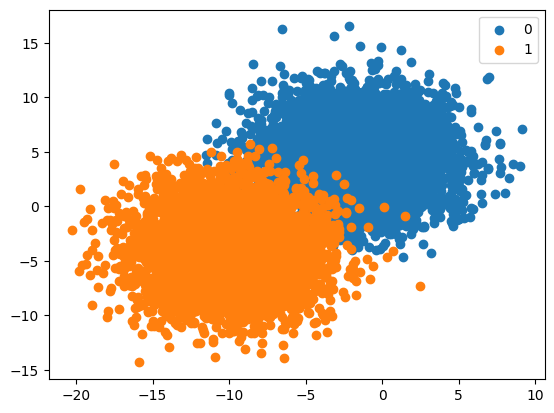

In [4]:
proportions = {0:5000, 1:5000}
X, y = create_data(proportions)
plot_scatter(X, y)

# **1 : 10**

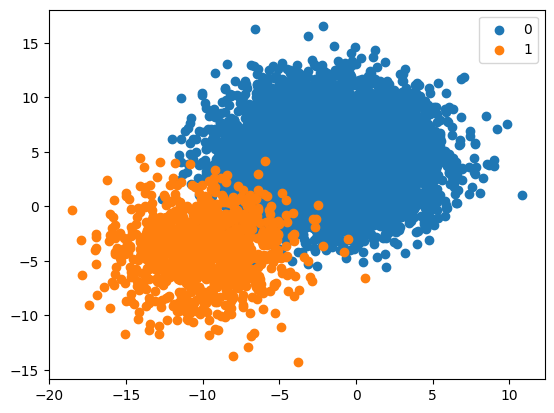

In [5]:
proportions = {0:10000, 1:1000}
X, y = create_data(proportions)
plot_scatter(X, y)

# **1 : 100**

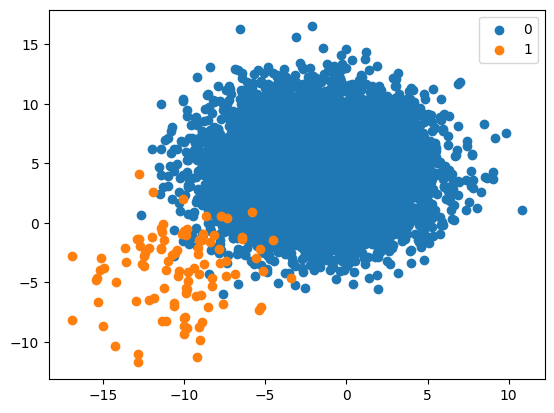

In [6]:
proportions = {0:10000, 1:100}
X, y = create_data(proportions)
plot_scatter(X, y)

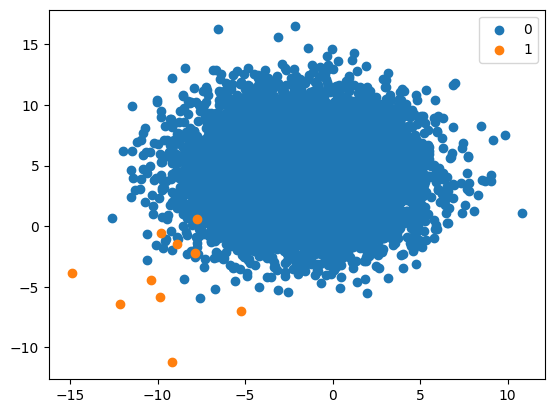

In [7]:
proportions = {0:10000, 1:10}
X, y = create_data(proportions)
plot_scatter(X, y)

# **Referencias**

https://machinelearningmastery.com/how-to-develop-an-intuition-skewed-class-distributions/